## Coursework - 1 (22092172) ##

In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
from scipy.stats import shapiro
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.metrics import mean_squared_error


In [2]:
data = yf.download(tickers ='goog', start = '2021-11-17', end = '2023-1-30')
len(data)

[*********************100%***********************]  1 of 1 completed


300

In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-17,149.229004,149.626007,148.563004,149.061996,149.061996,15290000
2021-11-18,149.145996,151.610001,148.998505,150.709000,150.709000,26658000
2021-11-19,151.000000,151.850006,149.887497,149.952499,149.952499,19766000
2021-11-22,150.141754,150.744507,147.005493,147.078506,147.078506,24608000
2021-11-23,147.113007,147.694000,144.889496,146.757004,146.757004,18126000
...,...,...,...,...,...,...
2023-01-23,99.129997,101.400002,98.750000,101.209999,101.209999,31791800
2023-01-24,99.550003,101.089996,98.699997,99.209999,99.209999,27391400
2023-01-25,97.199997,97.720001,95.262001,96.730003,96.730003,31000900


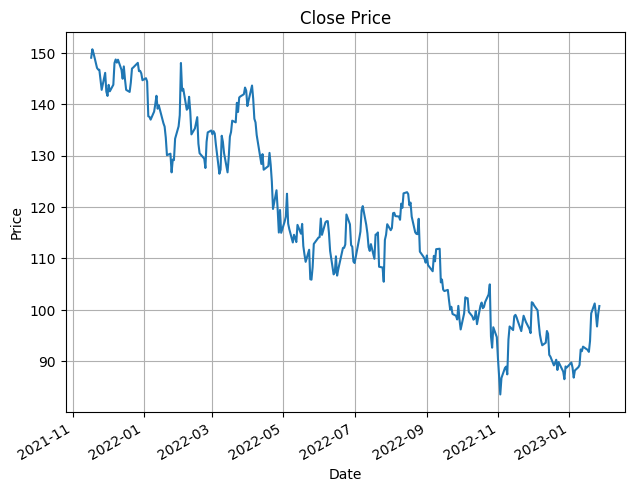

In [4]:
data['Close'].plot()
plt.tight_layout()
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Moving averages ##

Compute three moving averages of the price time series with time-windows t = 10,20,30

In [5]:
data['10_mavg'] = data['Close'].rolling(window = 10).mean()
data['20_mavg'] = data['Close'].rolling(window = 20).mean()
data['30_mavg'] = data['Close'].rolling(window = 30).mean()

Plot the moving averages against the price time series

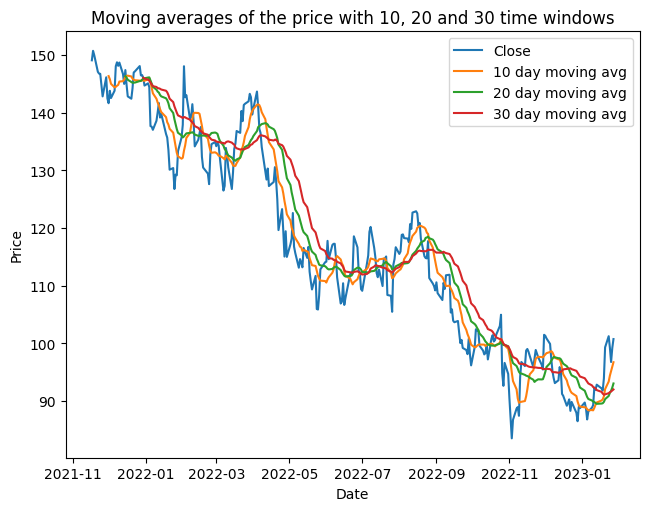

In [6]:
plt.plot(data['Close'], label = 'Close')
plt.plot(data['10_mavg'], label = '10 day moving avg')
plt.plot(data['20_mavg'], label = '20 day moving avg')
plt.plot(data['30_mavg'], label = '30 day moving avg')
plt.tight_layout()
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Moving averages of the price with 10, 20 and 30 time windows')
plt.legend()
plt.show()

Compute the linear and log-return of the price time series

In [7]:
data['Linear_return'] = (data['Close']/ data['Close'].shift(1)) - 1
data['Log_return'] =  np.log(data['Close']/data['Close'].shift(1))

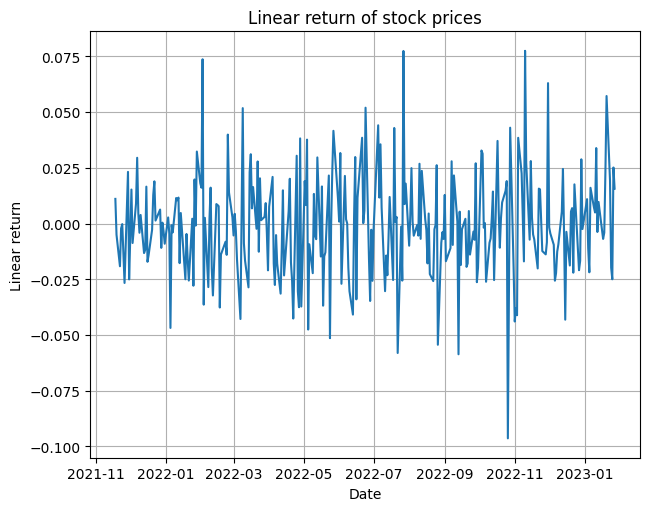

In [8]:
plt.plot(data['Linear_return'])
plt.tight_layout()
plt.title('Linear return of stock prices')
plt.ylabel('Linear return')
plt.xlabel('Date')
plt.grid()
plt.show()

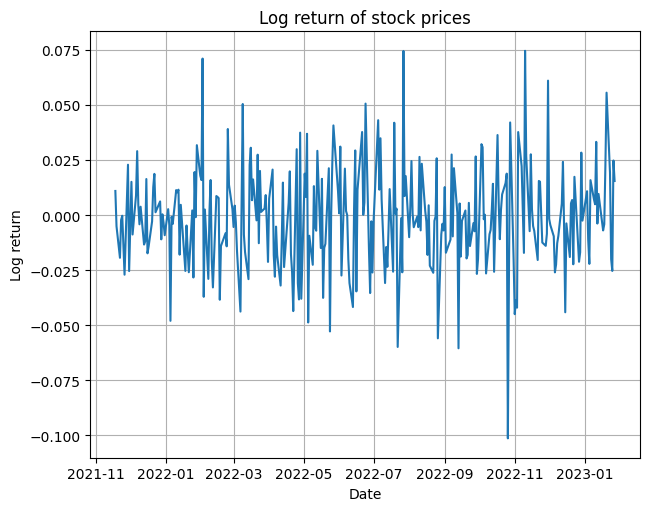

In [9]:
plt.plot(data['Log_return'])
plt.tight_layout()
plt.title('Log return of stock prices')
plt.ylabel('Log return')
plt.xlabel('Date')
plt.grid()
plt.show()

Plot the linear return against the log-return time series

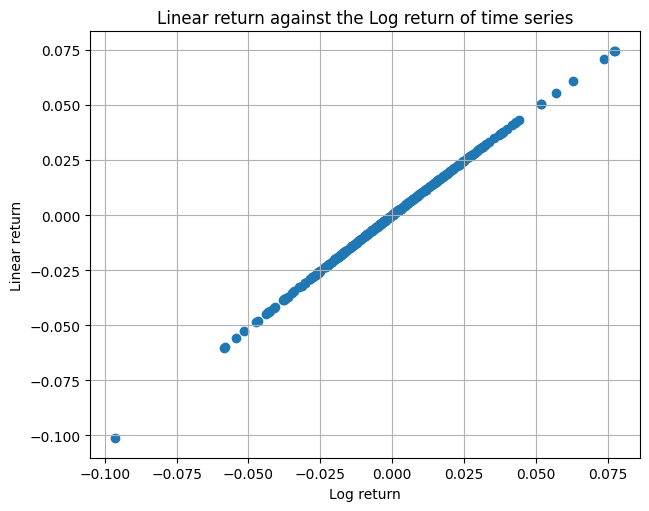

In [10]:
plt.scatter(data['Linear_return'], data['Log_return'])
plt.tight_layout()
plt.title('Linear return against the Log return of time series')
plt.ylabel('Linear return')
plt.xlabel('Log return')
plt.grid()
plt.show()

## Time Series Analysis ##

Compute the auto-correlation function (ACF) of the price time series

In [11]:
acf_values = acf(data['Close'])

In [12]:
acf_values

array([1.        , 0.9830806 , 0.9660982 , 0.94977618, 0.93566079,
       0.92250064, 0.90839768, 0.89553341, 0.88299349, 0.8727016 ,
       0.86167085, 0.84965928, 0.83816814, 0.82668301, 0.8121414 ,
       0.79766573, 0.78371053, 0.76968757, 0.75757429, 0.74437047,
       0.73049942, 0.71753926, 0.70636563, 0.6973408 , 0.68855659])

Plot the price ACF

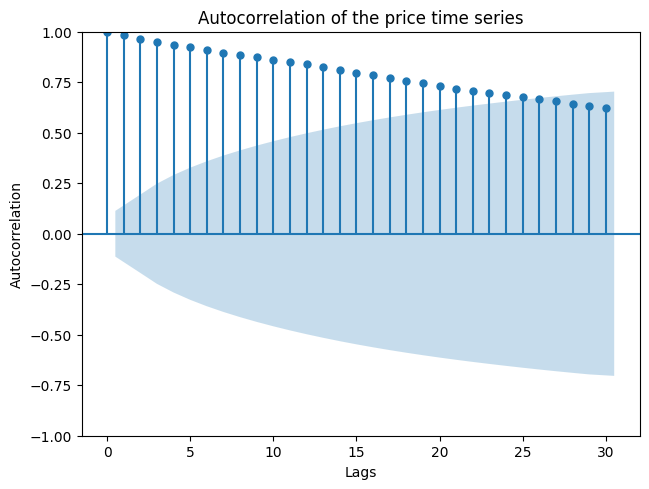

In [13]:
plot_acf(data['Close'], lags = 30)
plt.tight_layout()
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the price time series')
plt.show()

Compute the partial auto-correlation function (PACF) of the price time series

In [14]:
pacf_values = pacf(data['Close'])
pacf_values

array([ 1.        ,  0.98636849, -0.01258366,  0.01425313,  0.07233718,
        0.02715325, -0.04065207,  0.04631689,  0.00794239,  0.0758349 ,
       -0.02982784, -0.03473598,  0.02255815, -0.00560733, -0.13893392,
        0.00535246,  0.00937961, -0.03220585,  0.0566413 , -0.04731383,
       -0.04192363,  0.03526875,  0.03940635,  0.07569894,  0.03159283])

Plot the price PACF

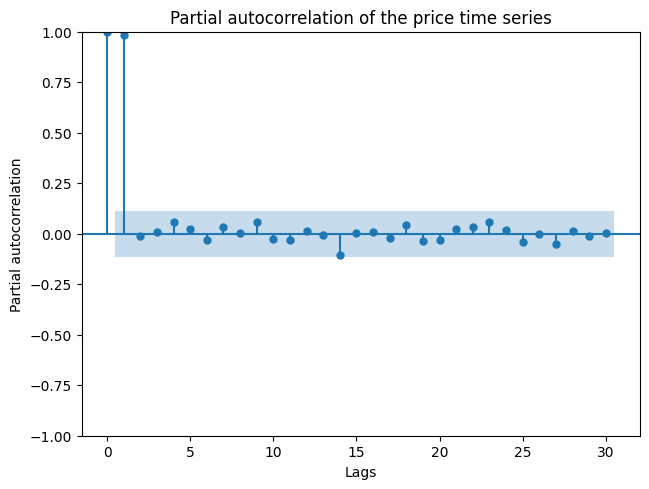

In [15]:
plot_pacf(data['Close'], lags = 30, method = 'ywm')
plt.tight_layout()
plt.xlabel('Lags')
plt.ylabel('Partial autocorrelation')
plt.title('Partial autocorrelation of the price time series')
plt.show()

Plot the return ACF

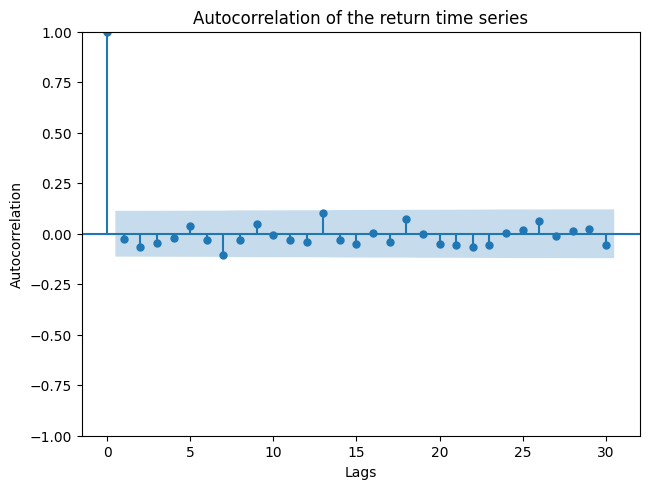

In [16]:
plot_acf(data['Linear_return'].dropna(), lags = 30)
plt.tight_layout()
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the return time series')
plt.show()

Plot the return PACF

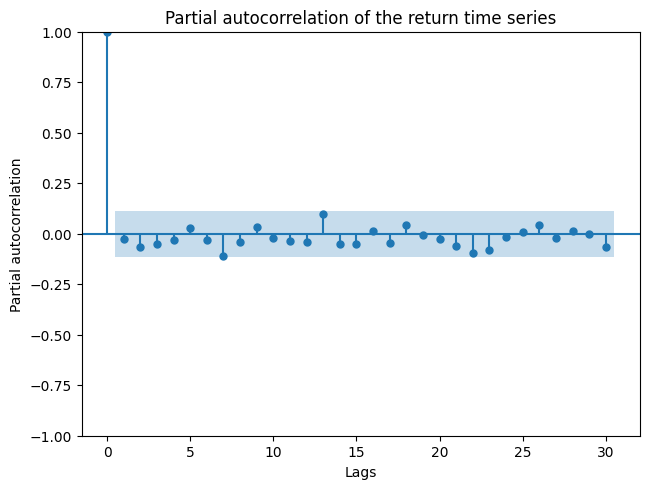

In [17]:
plot_pacf(data['Linear_return'].dropna(), lags = 30, method = 'ywm')
plt.tight_layout()
plt.xlabel('Lags')
plt.ylabel('Partial autocorrelation')
plt.title('Partial autocorrelation of the return time series')
plt.show()

## ARMA models ##

Define a training and test set and fit an ARMA model to the price time series


In [18]:
X = data['Close'].values
train, test = X[1:int(len(data)*0.6)], X[int(len(data)*0.6):]

In [19]:
train.shape, test.shape

((179,), (120,))

Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set

In [20]:
p = 1
d = 0
q = 1
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  179
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -443.288
Date:                Sat, 18 Feb 2023   AIC                            894.576
Time:                        22:24:06   BIC                            907.326
Sample:                             0   HQIC                           899.746
                                - 179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.6591      7.519     17.377      0.000     115.922     145.397
ar.L1          0.9815      0.015     66.420      0.000       0.953       1.010
ma.L1         -0.0439      0.083     -0.531      0.5

In [21]:
predictions_train = model_fit.predict(start = 0, end = len(train) - 1, dynamic = False)
predictions_test = model_fit.predict(start = len(train), end = len(train) + len(test) - 1, dynamic=False)

error_train_set = mean_squared_error(train, predictions_train)
error_test_set = mean_squared_error(test, predictions_test)

In [22]:
print("Mean squared error for train: ", error_train_set)
print("Mean squared error for test: ", error_test_set)

Mean squared error for train:  10.298216574830676
Mean squared error for test:  816.2554748382739


Plot the price time series vs the ARMA forecast in the test set

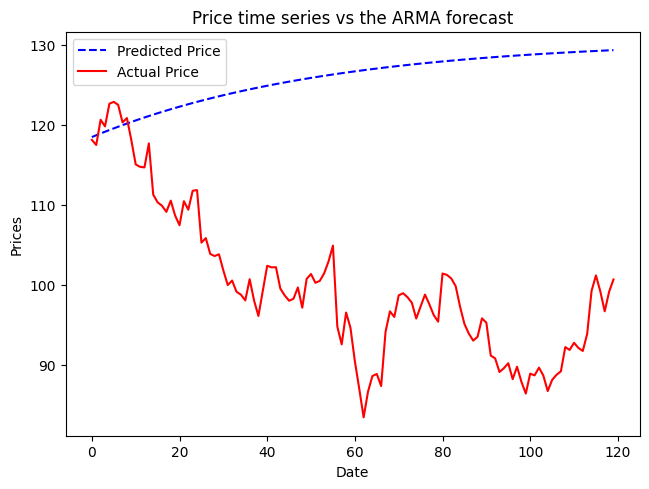

In [25]:
plt.plot(predictions_test, color = 'blue', linestyle = 'dashed',label = 'Predicted Price')
plt.plot(test, color = 'red', label = 'Actual Price')
plt.title('Price time series vs the ARMA forecast')
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

Fit an ARMA model to the return time series

In [26]:
X_ret = data['Linear_return'].dropna().values
train_ret, test_ret = X_ret[1:int(len(data)*0.6)], X_ret[int(len(data)*0.6):]

In [27]:
train_ret.shape, test_ret.shape

((179,), (119,))

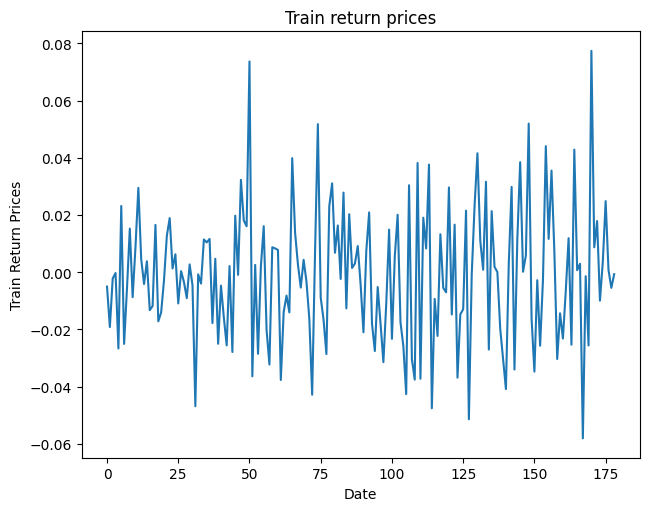

In [28]:
plt.plot(train_ret)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Train Return Prices')
plt.title('Train return prices')
plt.show()

Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set

In [29]:
p, d, q = 1, 0, 1
model_ret = ARIMA(train_ret, order=(p, d, q))
model_ret_fit = model_ret.fit()
print(model_ret_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  179
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 421.661
Date:                Sat, 18 Feb 2023   AIC                           -835.322
Time:                        22:25:37   BIC                           -822.572
Sample:                             0   HQIC                          -830.152
                                - 179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.002     -0.639      0.523      -0.004       0.002
ar.L1         -0.6992      0.475     -1.473      0.141      -1.629       0.231
ma.L1          0.6362      0.516      1.233      0.2

In [33]:
predictions_ret_train = model_ret_fit.predict(start = 0, end = len(train_ret) - 1, dynamic = False)
predictions_ret_test = model_ret_fit.predict(start = len(train_ret), end = len(train_ret) + len(test_ret) - 1, dynamic=False)

error_train_set = mean_squared_error(train_ret, predictions_ret_train)
error_test_set = mean_squared_error(test_ret, predictions_ret_test)

In [34]:
print("Mean squared error for train: ", error_train_set)
print("Mean squared error for test: ", error_test_set)

Mean squared error for train:  0.0005265163117657955
Mean squared error for test:  0.0005763401745449846


Plot the return time series vs the ARMA forecast in the test set

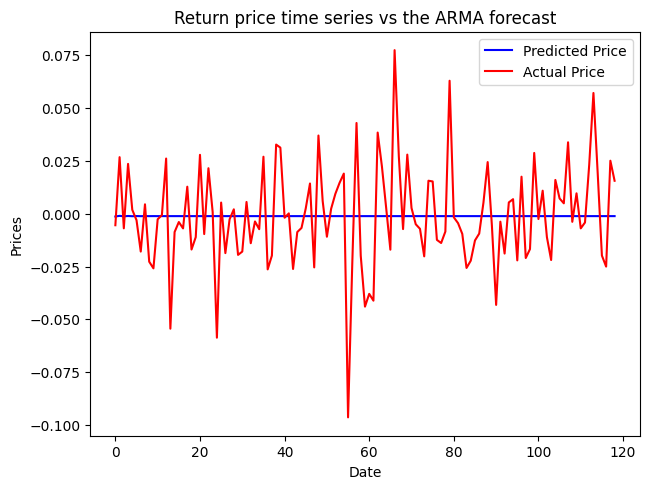

In [35]:
plt.plot(predictions_ret_test, color='blue', label='Predicted Price')
plt.plot(test_ret, color='red', label='Actual Price')
plt.title('Return price time series vs the ARMA forecast')
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

We also try using rolling forcast method to check if it gives better result.

In [36]:
#ARMA model using rolling forcast
warnings.filterwarnings('ignore')
history = [x for x in train_ret]
model_predictions = []

p, d, q = 1, 0, 1
for time_point in range(len(test_ret)):
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_ret[time_point]
    history.append(true_test_value)
    
error = mean_squared_error(test_ret, model_predictions)
print("Mean squared error for test of return: ", error)

Mean squared error for test of return:  0.0005838636936841351


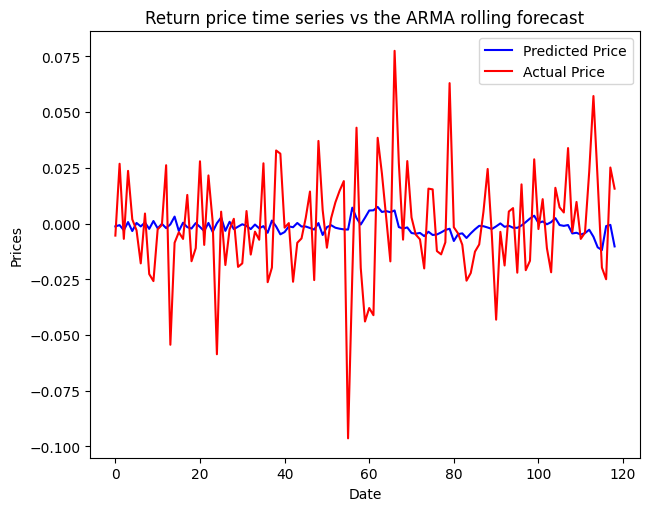

In [38]:
plt.plot(model_predictions, color = 'blue', label = 'Predicted Price')
plt.plot(test_ret, color = 'red', label = 'Actual Price')
plt.tight_layout()
plt.title('Return price time series vs the ARMA rolling forecast')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

## Gaussianity and Stationarity test ##

Perform a Gaussianity test of the return time series

In [39]:
#Gaussianity test
stat, p = shapiro(data['Linear_return'].dropna())
print('Statistic = %.6f, p = %.6f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic = 0.986416, p = 0.006441
Sample does not look Gaussian (reject H0)


Perform a stationarity test of the return time series

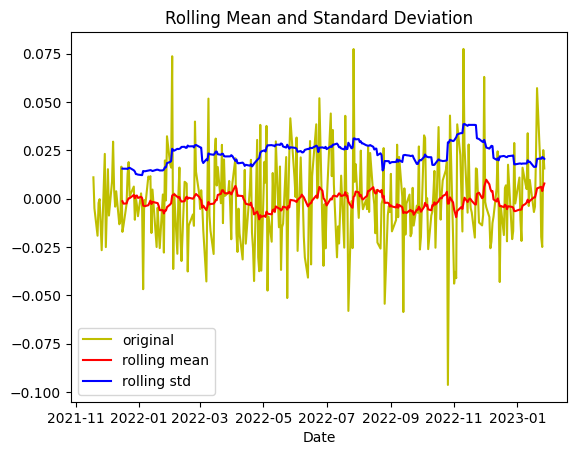

Results of dickey fuller test
ADF Test Statistic : -17.646739051586813
p-value : 3.7366334439393935e-30
#Lags Used : 0
Number of Observations Used : 298
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary


In [40]:
#Stationarity test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    plt.tight_layout()
    plt.plot(timeseries, color = 'y', label = 'original')
    plt.plot(rolmean, color = 'r', label = 'rolling mean')
    plt.plot(rolstd, color = 'b', label = 'rolling std')
    plt.xlabel('Date')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
 
    print('Results of dickey fuller test')
    result = adfuller(timeseries, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")

test_stationarity(data['Linear_return'].dropna())